### EDA & Features for SF Crime DATA

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
fig_size=[]
fig_size.append(20)
fig_size.append(20)
plt.rcParams["figure.figsize"] = fig_size

In [4]:
train = pd.read_csv("data/train 2.csv")
test = pd.read_csv("data/test.csv")
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


### Data:

- **Dates**: timestamp of the crime incident
- **Category**: category if the crime incident (only in train.csv) **Response**
- **Descript**: detailed description of the crime incident (only in train.csv)
- **DayofWeek**: the day of the week
- **PdDistrict** : name of the Police Department District
- **Resolution**: how the crime incident was resolved (only in train.csv)
- ** Address**: the approximate street address of the crime incident
- **X**: Longitude
- **Y**: Latitude

In [21]:
X_train = train.drop(['Descript','Resolution'], axis=1)
y_train = train['Category']

### Maybe a column of hour (1-24) can help?

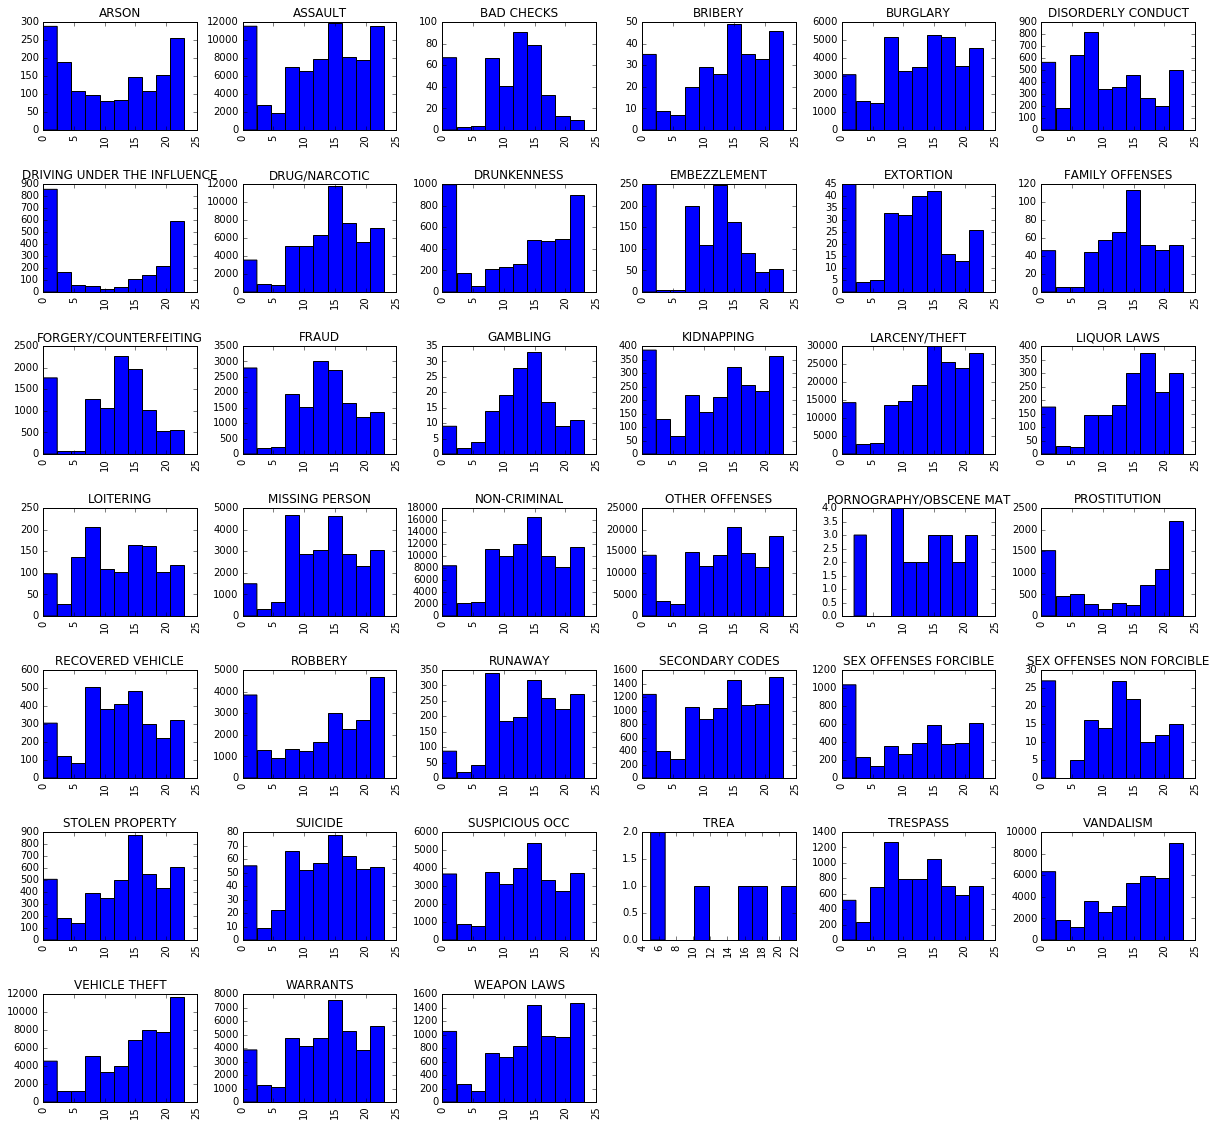

In [40]:
def hour(x):
    y=x[-8:-6]
    return int(y)
width = 12
height = 20

X_train['Hour'] = map(hour, X_train.Dates)
X_train['Hour'].hist(by=X_train['Category'])
plt.figure(figsize=(width, height))

Some categories will clearly benefit from this feature. 
For example, **Arson, Driving Under the Influence, Prostitution, Drunkenness, and Disorderly Conduct** are categories which happen late at night and very early in the morning. 

In [42]:
from io import BytesIO
import Image
import urllib

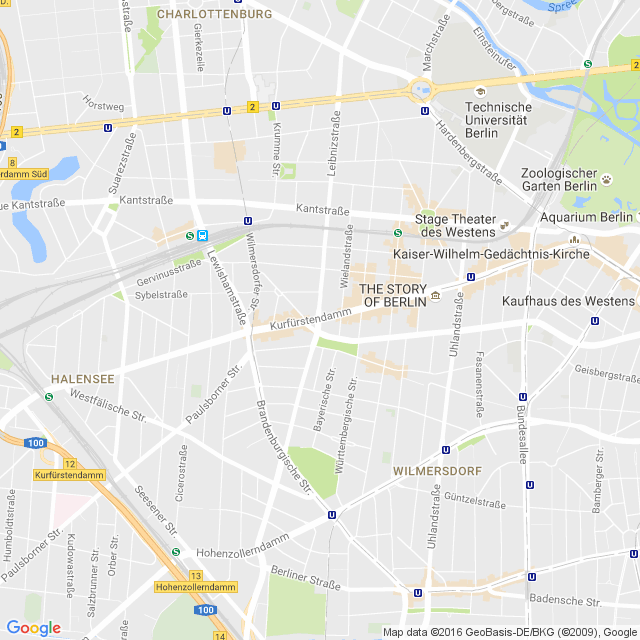

In [45]:
url = "http://maps.googleapis.com/maps/api/staticmap?center=52.50058,13.31316&size=800x800&zoom=14"
buffer = BytesIO(urllib.urlopen(url).read())
image = Image.open(buffer)
image